# Data preprocessing
colab에 제공할 데이터를 image data -> pickle(X, y) 형태로 가공하는 과정<br>
작업폴더구조<br>
data/[apple_img, apple_label,..., radish_img, radish_label]<br>
apple_img/[apple_fuji_L_1-1.png, ...]<br>
apple_label/[apple_fuji_L_1-1.json, ...]

In [1]:
import json
import glob
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
import pickle

In [2]:
# 이미지, plotting 관련
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [3]:
def get_label(filenames):
  """
  각각의 파일명(key)에 대응하는 상품 등급(value)
  담은 dictionary 반환
  """ 
  labels = {}

  for f in tqdm(filenames):
    with open(f, "r", encoding='utf-8') as json_file:
      try:
        d = json.load(json_file)
      except UnicodeDecodeError:
        print('Unicode_error')
        continue
    
    file_name = f.split('\\')[-1]
    file_name = file_name.split('.')[0]
    labels[file_name] = d['cate3']
  return labels

In [4]:
def get_raw_imgs(img_names):
  """
  파일명을 input, 각각의 이미지를 100x100x3 list로 반환
  """
  imgs = []
  for i in img_names:
    imgs.append(imread(i))
  
  return imgs

In [5]:
def make_dataset(img_names, labels):
  X = []
  y = []
  fn = []
  for img_nm in tqdm(img_names):
    try:
      img_raw = imread(img_nm)  # 0~255 이미지 데이터
      if img_raw.shape[-1] == 4:
            img_raw = img_raw[:,:,:-1]
    except ValueError:
      print('Error about image')
      continue
        
    pure_nm = img_nm.split('\\')[-1].split('.')[0]  # 순수한 파일 명(확장자 제외)
    # img_raw = resize(img_raw, (100, 100))  # min_max scaling
    label = labels.get(pure_nm, 0)
    if label:  # label이 0이 아니면
      X.append(img_raw)
      y.append(label)
      fn.append(pure_nm)
  
  X = np.array(X)
  y = np.array(y)
  fn = np.array(fn)
  return X, y, fn

In [8]:
# 총 10가지의 작물 이름
all_file_names = glob.glob('data/*')

In [11]:
all_file_names

['data\\apple_img',
 'data\\apple_label',
 'data\\cabbage_img',
 'data\\cabbage_label',
 'data\\chinese_img',
 'data\\chinese_label',
 'data\\garlic_img',
 'data\\garlic_label',
 'data\\mandarin_img',
 'data\\mandarin_label',
 'data\\onion_img',
 'data\\onion_label',
 'data\\pear_img',
 'data\\pear_label',
 'data\\persimmon_img',
 'data\\persimmon_label',
 'data\\potato_img',
 'data\\potato_label',
 'data\\radish_img',
 'data\\radish_label']

In [12]:
fruit_names = list(set(x.split('\\')[-1].split('_')[0] for x in all_file_names))

In [13]:
fruit_names.sort()

In [14]:
fruit_names

['apple',
 'cabbage',
 'chinese',
 'garlic',
 'mandarin',
 'onion',
 'pear',
 'persimmon',
 'potato',
 'radish']

In [15]:
subclass_dict = {}

In [16]:
for fruit_name in tqdm(fruit_names):

    img_names = glob.glob(f'data/{fruit_name}_img/*')
    subclass = set([x.split('\\')[-1].split('_')[1] for x in img_names])

    subclass_dict[fruit_name] = subclass

100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


In [20]:
subclass_dict['chinese'] = set(['cabbage'])

In [21]:
subclass_dict  # 서브클래스 확인

{'apple': {'fuji', 'yanggwang'},
 'cabbage': {'green', 'red'},
 'chinese': {'cabbage'},
 'garlic': {'uiseong'},
 'mandarin': {'hallabong', 'onjumilgam'},
 'onion': {'red', 'white'},
 'pear': {'chuhwang', 'singo'},
 'persimmon': {'bansi', 'booyu', 'daebong'},
 'potato': {'seolbong', 'sumi'},
 'radish': {'winter radish'}}

## Plotting

In [22]:
def get_raw_imgs(img_names):
    """
    파일명을 input, 각각의 이미지를 100x100x3 list로 반환
    """
    imgs = []
    for i in img_names:
        imgs.append(imread(i))

    return imgs

In [23]:
def img_plotting(imgs, titles, *args):
    """
    plotting 함수
    """
    plt.figure(figsize=(12, 6))
    titles = ['_'.join(x.split('\\')[-1].split('_')[:3]) for x in img_locs]
    for i in range(args[0]*args[1]):
        ax = plt.subplot(args[0], args[1], i + 1)
        plt.imshow(imgs[i])
        plt.title(titles[i])
        plt.axis("off")

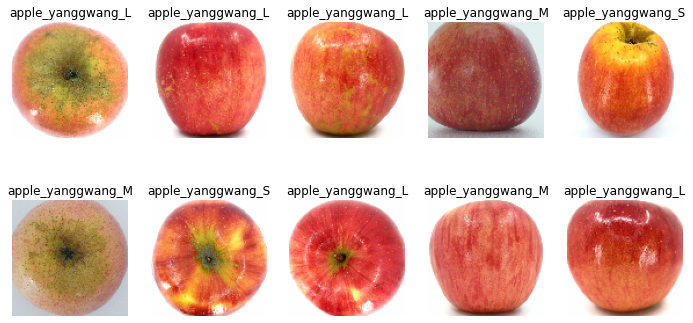

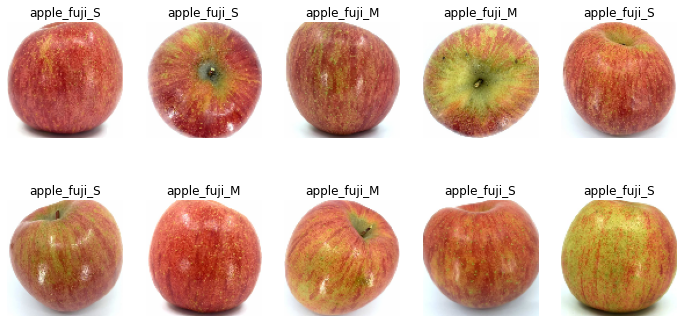

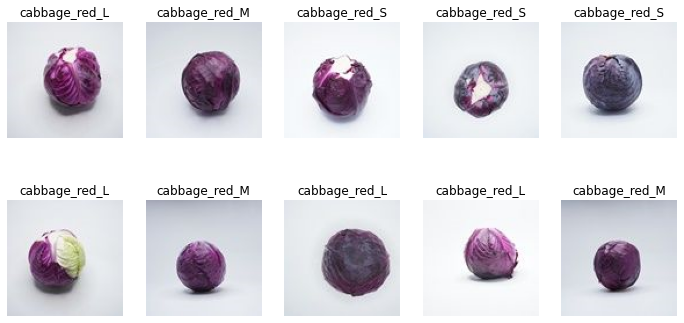

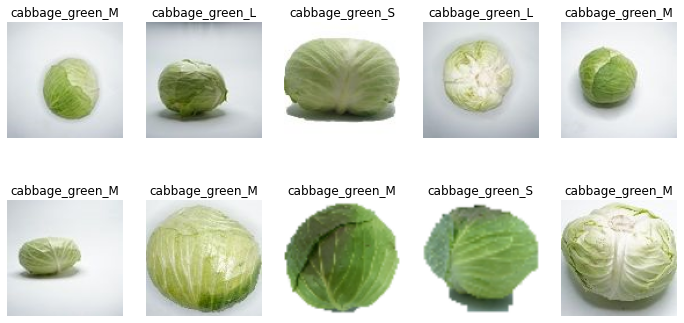

In [26]:
n = 20
np.random.seed(2021)
for fruit_name in fruit_names[:2]:
    for subclass in  subclass_dict[fruit_name]:
        img_names = glob.glob(f'data/{fruit_name}_img/*')
        if subclass == 'cabbage':
            img_locs = np.random.choice(img_names, n, replace=False)
        else:
            img_locs = np.random.choice([x for x in img_names if x.split('\\')[-1].split('_')[1] == subclass],
                                n, replace=False)
        imgs_info = get_raw_imgs(img_locs)
        img_plotting(imgs_info, img_locs, 2, 5)
        plt.savefig(f'./{fruit_name}_{subclass}.png')


In [28]:
fruit_name

'cabbage'

In [27]:
# filenames = glob.glob(f'data/{fruit_name}_label/*')
# labels = get_label(filenames)

100%|██████████| 15171/15171 [00:05<00:00, 2824.03it/s]


In [ ]:
X??

In [31]:
img_names = glob.glob(f'data/{fruit_name}_img/*')

In [33]:
len(img_names)

14193

In [59]:
X, y, fn = make_dataset(img_names, labels)

100%|██████████| 14193/14193 [00:13<00:00, 1020.56it/s]


In [ ]:
X -> modeling

In [67]:
set(y)

{'보통', '상', '특'}

In [ ]:
dataset = {'X': X, 'y': y, 'file_name': fn}

with open(f'data_colab/{fruit_name}.pkl', 'wb') as f:
    pickle.dump(dataset, f)

In [ ]:
# X, y, filename 을 담고있는 pickle 데이터 저장
for fruit_name in fruit_names:
    
    print(f'process {fruit_name}')
    filenames = glob.glob(f'data/{fruit_name}_label/*')
    labels = get_label(filenames)
    img_names = glob.glob(f'data/{fruit_name}_img/*')

    X, y, fn = make_dataset(img_names, labels)

    dataset = {'X': X, 'y': y, 'file_name': fn}

    with open(f'data_colab/{fruit_name}.pkl', 'wb') as f:
        pickle.dump(dataset, f)